In [1]:
# Importing necessary libraries
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import zscore
from matplotlib import pyplot as plt

print ("Setup Completed!")

Setup Completed!


In [2]:
# Constants
path_to_dataset = "significant-earthquake-database.csv"

In [3]:
# Loading dataset
data = pd.read_csv(path_to_dataset, index_col="ID Earthquake", sep=";")
data.head()

,Flag Tsunami,Year,Month,Day,Focal Depth,EQ Primary,Mw Magnitude,Ms Magnitude,Mb Magnitude,Ml Magnitude,...,Total Effects : Missing Description,Total Effects : Injuries,Total Effects : Injuries Description,Total Effects : Damages in million Dollars,Total Effects : Damage Description,Total Effects : Houses Destroyed,Total Effects : Houses Destroyed Description,Total Effects : Houses Damaged,Total Effects : Houses Damaged Description,Coordinates
ID Earthquake,,,,,,,,,,,,,,,,,,,,,
78,NaN,334,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"41.2, 19.3"
84,Tsunami,344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,SEVERE (~>$5 to $24 million),NaN,NaN,NaN,NaN,"40.3, 26.5"
9989,Tsunami,346,NaN,NaN,NaN,6.8,NaN,6.8,NaN,NaN,...,NaN,NaN,NaN,NaN,MODERATE (~$1 to $5 million),NaN,Many (~101 to 1000 houses),NaN,NaN,"41.4, 19.4"
110,NaN,438,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"35.5, 25.5"
9971,Tsunami,557,NaN,NaN,NaN,7.0,NaN,7.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"40.9, 27.6"


In [4]:
columns = list(data.columns)
print(f"Number of rows: {data.shape[0]}")
print(f"Number of columns: {len(columns)}")
print("List of all columns:")
print(columns)

Number of rows: 6208
Number of columns: 42
List of all columns:
['Flag Tsunami', 'Year', 'Month', 'Day', 'Focal Depth', 'EQ Primary', 'Mw Magnitude', 'Ms Magnitude', 'Mb Magnitude', 'Ml Magnitude', 'MFA Magnitude', 'Unknown Magnitude', 'Intensity', 'Country', 'State', 'Location name', 'Region code', 'Earthquake : Deaths', 'Earthquake : Deaths Description', 'Earthquake : Missing', 'Earthquake : Missing Description', 'Earthquake : Injuries', 'Earthquake : Injuries Description', 'Earthquake : Damage (in M$)', 'Earthquake : Damage Description', 'Earthquakes : Houses destroyed', 'Earthquakes : Houses destroyed Description', 'Earthquakes : Houses damaged', 'Earthquakes : Houses damaged Description', 'Total Effects : Deaths', 'Total Effects : Deaths Description', 'Total Effects : Missing', 'Total Effects : Missing Description', 'Total Effects : Injuries', 'Total Effects : Injuries Description', 'Total Effects : Damages in million Dollars', 'Total Effects : Damage Description', 'Total Effects 

## About Dataset

### Context
The Significant Earthquake Database is a global listing of over 5,700 earthquakes from 2150 BC to the present.

### Content
A significant earthquake is classified as one that meets at least one of the following criteria: caused deaths, caused moderate damage (approximately 1 million dollars or more), magnitude 7.5 or greater, Modified Mercalli Intensity (MMI) X or greater, or the earthquake generated a tsunami. The database provides information on the date and time of occurrence, latitude and longitude, focal depth, magnitude, maximum MMI intensity, and socio-economic data such as the total number of casualties, injuries, houses destroyed, and houses damaged, and $ dollage damage estimates. References, political geography, and additional comments are also provided for each earthquake. If the earthquake was associated with a tsunami or volcanic eruption, it is flagged and linked to the related tsunami event or significant volcanic eruption.

### Columns

#### Basic Earthquake Info
<ul>
    <li>Focal Depth - depth of epicenter in kilometers</li>
    <li>EQ Primary - magnitude of earthquake (primary measured magnitude) from 1 to 10</li>
    <li>Intensity - modified Mercalli intensity from 1 to 12</li>
    <li>Flag Tsunami - true if tsunami earthquake trigged tsunami</li>
</ul>

#### Date
<ul>
    <li>Year</li>
    <li>Month</li>
    <li>Day</li>
</ul>

#### Location
<ul>
    <li>Coordinates - (latitude, longitude)</li>
    <li>Country</li>
    <li>State</li>
    <li>Location name</li>
    <li>Region code</li>
</ul>

#### Magnitudes
The magnitude is a measure of seismic energy. The magnitude scale is logarithmic. An increase of one in magnitude represents a tenfold increase in the recorded wave amplitude. However, the energy release associated with an increase of one in magnitude is not tenfold, but about thirtyfold. For example, approximately 900 times more energy is released in an earthquake of magnitude 7 than in an earthquake of magnitude 5. Each increase in magnitude of one unit is equivalent to an increase of seismic energy of about 1.6 x 10,000,000,000,000 ergs.
All magnitudes have valid values between 0 and 10.

<ul>
    <li>Mw Magnitude 
    <br>
    The Mw magnitude is based on the moment magnitude scale. Moment is a physical quantity proportional to the slip on the fault times the area of the fault surface that slips; it is related to the total energy released in the EQ. The moment can be estimated from seismograms (and also from geodetic measurements). The moment is then converted into a number similar to other earthquake magnitudes by a standard formula. The result is called the moment magnitude. The moment magnitude provides an estimate of earthquake size that is valid over the complete range of magnitudes, a characteristic that was lacking in other magnitude scales.</li>
    <li>Ms Magnitude
    <br>
    The Ms magnitude is the surface-wave magnitude of the earthquake.
    </li>
    <li>Mb Magnitude
    <br>
    The Mb magnitude is the compressional body wave (P-wave) magnitude.
    </li>
    <li>Ml Magnitude
    <br>
    The ML magnitude was the original magnitude relationship defined by Richter and Gutenberg for local earthquakes in 1935. It is based on the maximum amplitude of a seismogram recorded on a Wood-Anderson torsion seismograph. Although these instruments are no longer widely in use, ML values are calculated using modern instrumentation with appropriate adjustments.
    </li>
    <li>MFA Magnitude
    <br>
    The Mfa magnitudes are computed from the felt area, for earthquakes that occurred before seismic instruments were in general use.
    </li>
    <li>Unknown Magnitude
    <br>
    The computational method for the earthquake magnitude was unknown and could not be determined from the published sources.
    </li>
</ul>

#### Earthquake Effects

<ul>
    <li>Earthquake : Deaths</li>
    <li>Earthquake : Deaths Description</li>
    <li>Earthquake : Missing</li>
    <li>Earthquake : Missing Description</li>
    <li>Earthquake : Injuries</li>
    <li>Earthquake : Injuries Description</li>
    <li>Earthquake : Damage (in M$)</li>
    <li>Earthquake : Damage Description</li>
    <li>Earthquakes : Houses destroyed</li>
    <li>Earthquakes : Houses destroyed Description</li>
    <li>Earthquakes : Houses damaged</li>
    <li>Earthquakes : Houses damaged Description</li>
</ul>

#### Total Earthquake Effects

<ul>
    <li>Total Effects : Deaths</li>
    <li>Total Effects : Deaths Description</li>
    <li>Total Effects : Missing</li>
    <li>Total Effects : Missing Description</li>
    <li>Total Effects : Injuries</li>
    <li>Total Effects : Injuries Description</li>
    <li>Total Effects : Damages in million Dollars</li>
    <li>Total Effects : Damage Description</li>
    <li>Total Effects : Houses destroyed</li>
    <li>Total Effects : Houses destroyed Description</li>
    <li>Total Effects : Houses damaged</li>
    <li>Total Effects : Houses damaged Description</li>
</ul>


## Feature Engineering

Feature Engineering will be performed for each of these column groups separately. First we will decide what columns to keeps, measure number of null values and decide what to do with them . Also we will consider does some features needs to be combined in some way for better further analysis.

### Data Type and Format Conversions

#### Basic Info

In [5]:
basic_info_columns = ["Focal Depth", "EQ Primary", "Intensity", "Flag Tsunami"]
basic_data = data[basic_info_columns]
# Print tail because newer earthquakes have smaller number of null values
basic_data.tail()

,Focal Depth,EQ Primary,Intensity,Flag Tsunami
ID Earthquake,,,,
10245,26.0,6.9,9.0,Tsunami
10267,39.0,7.1,9.0,NaN
10367,10.0,5.3,NaN,NaN
10430,10.0,3.8,NaN,NaN
10515,10.0,6.6,7.0,NaN


In [6]:
basic_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 78 to 10515
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Focal Depth   3243 non-null   float64
 1   EQ Primary    4416 non-null   float64
 2   Intensity     2826 non-null   float64
 3   Flag Tsunami  1838 non-null   object 
dtypes: float64(3), object(1)
memory usage: 242.5+ KB


In [7]:
# Numeric basic info data
basic_data.describe()

,Focal Depth,EQ Primary,Intensity
count,3243.000000,4416.000000,2826.000000
mean,41.064755,6.458084,8.283439
std,70.317966,1.045100,1.825092
min,0.000000,1.600000,2.000000
25%,10.000000,5.700000,7.000000
50%,25.000000,6.500000,8.000000
75%,40.000000,7.300000,10.000000
max,675.000000,9.500000,12.000000


In [8]:
# Categorical basic info data
basic_data["Flag Tsunami"].value_counts()

Tsunami    1838
Name: Flag Tsunami, dtype: int64

We can see that if the tsunami occured we have flag set to Tsunami and if not the flag is left to be null. We will convert this column to boolean type with values True or False. 

In [9]:
tsunamies = (basic_data["Flag Tsunami"] == "Tsunami")
basic_data = basic_data.copy()  # create a new copy of the data
basic_data.loc[:, "Flag Tsunami"] = tsunamies.values
basic_data["Flag Tsunami"].value_counts()

/tmp/ipykernel_13415/3550770302.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  basic_data.loc[:, "Flag Tsunami"] = tsunamies.values


False    4370
True     1838
Name: Flag Tsunami, dtype: int64

In [10]:
# Set these changes to original dataset
data[basic_info_columns] = basic_data

#### Location

In [11]:
location_columns = ["Coordinates", "Country", "State", "Location name", "Region code"]
location_data = data[location_columns]
location_data.tail()

,Coordinates,Country,State,Location name,Region code
ID Earthquake,,,,,
10245,"5.504, 125.066",PHILIPPINES,NaN,PHILIPPINES: SARANGANI,170.0
10267,"18.339, -98.68",MEXICO,NaN,"MEXICO: MEXICO CITY, MORELOS, PUEBLA",150.0
10367,"26.374, 90.165",INDIA,NaN,INDIA: WEST BENGAL,60.0
10430,"20.0, 72.9",INDIA,NaN,INDIA: MAHARASHTRA: PALGHAR,60.0
10515,"12.021, 124.123",PHILIPPINES,NaN,PHILIPPINES: MASBATE,170.0


In [12]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 78 to 10515
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Coordinates    6153 non-null   object 
 1   Country        6208 non-null   object 
 2   State          323 non-null    object 
 3   Location name  6207 non-null   object 
 4   Region code    6207 non-null   float64
dtypes: float64(1), object(4)
memory usage: 291.0+ KB


In [37]:
# Region code is numerical value, but it is actually categorical
print(location_data["Region code"].value_counts().sort_index())
# We can convert it to integer for now
location_data = location_data.astype({"Region code": "Int16"})

10       75
15      107
20        4
30     1045
40      305
50      120
60      472
70       13
80        1
90      165
100     169
110      50
120     127
130     846
140     810
150     490
160     600
170     808
Name: Region code, dtype: Int64


In [14]:
# We will split coordinates into latitude and longitude
location_data[["Latitude", "Longitude"]] = location_data["Coordinates"].str.split(",", n=1, expand=True)
location_data.astype({"Latitude": "Float64", "Longitude": "Float64"})
location_data.drop("Coordinates", axis=1, inplace=True)

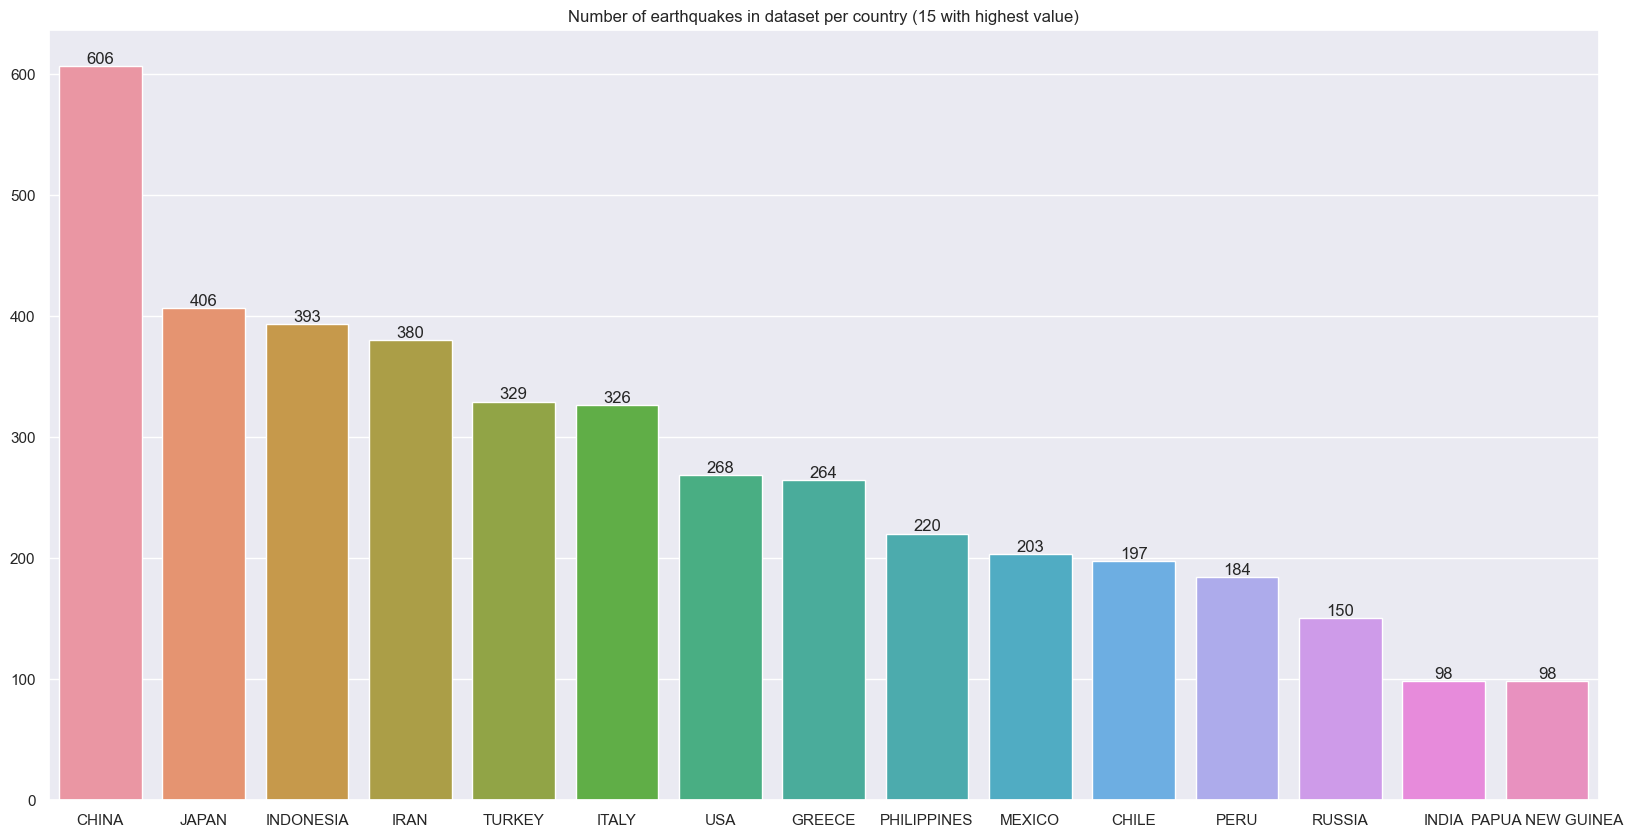

In [15]:
# Number of eartquakes by country
earthquakes_by_country = location_data["Country"].value_counts()[:15]
sns.set(font_scale=1, rc={"figure.figsize": (20, 10)})
ax = sns.barplot(x=earthquakes_by_country.index, y=earthquakes_by_country.values)
ax.bar_label(ax.containers[0])
plt.title("Number of earthquakes in dataset per country (15 with highest value)")
plt.show()


In [16]:
# Set these changes to original dataset
data.drop("Coordinates", axis=1, inplace=True)
data[location_data.columns] = location_data

#### Date data

In [17]:
date_columns = ["Year", "Month", "Day"]
date_data = data[date_columns]
date_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 78 to 10515
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    6208 non-null   int64  
 1   Month   5800 non-null   float64
 2   Day     5646 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 194.0 KB


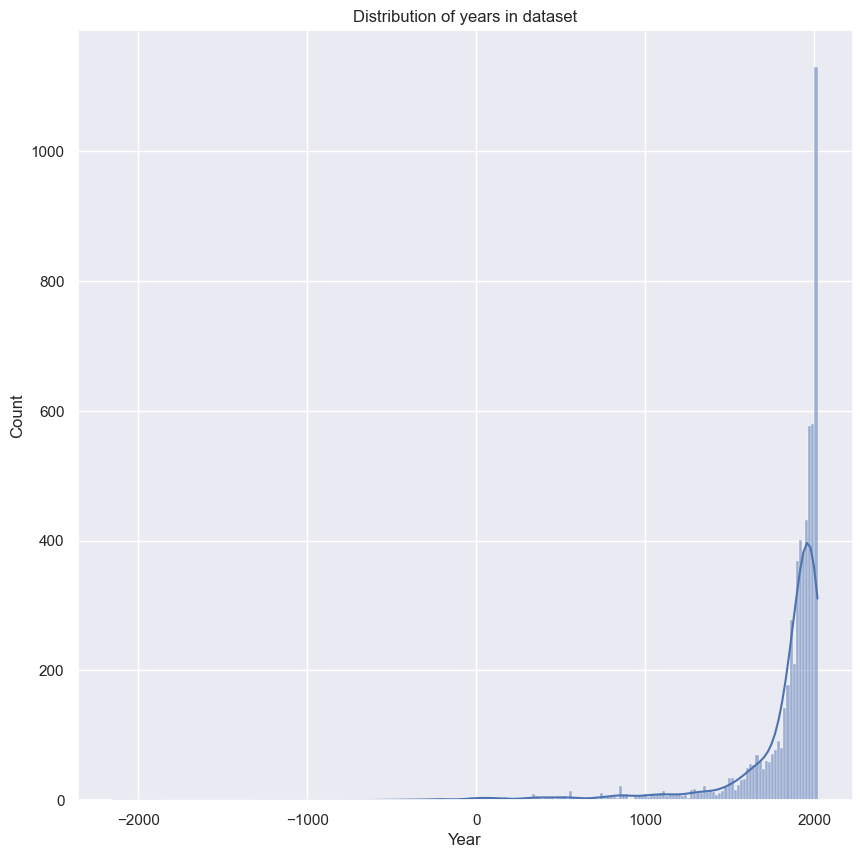

In [18]:
# We should convert month and day to be int
date_data = date_data.astype({"Month": "Int32", "Day": "Int32"})
# Plot year distribution
sns.set(font_scale=1, rc={"figure.figsize": (10, 10)})
sns.histplot(date_data["Year"], kde=True)
plt.title("Distribution of years in dataset")
plt.show()

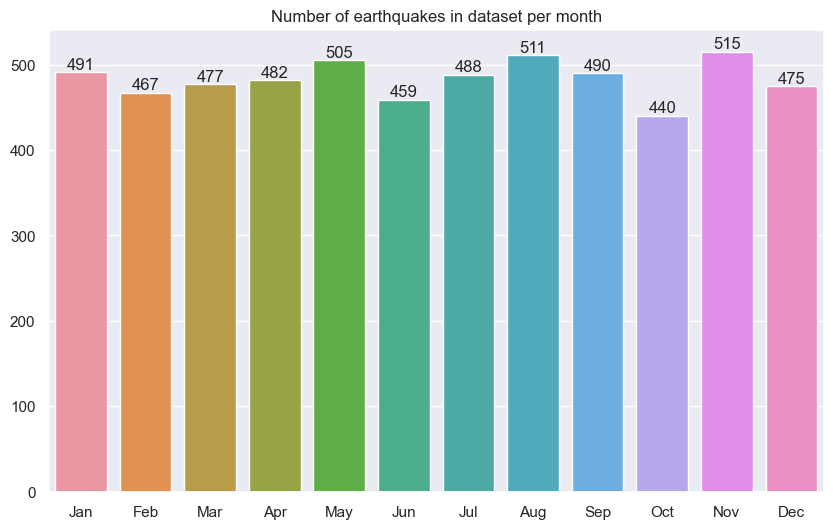

In [19]:
# Plot counts of earthquake occurence per months
def month_number_to_short(month_num):
    datetime_object = datetime.datetime.strptime(str(month_num), "%m")
    month_name = datetime_object.strftime("%b")
    return month_name

earthquakes_by_month = date_data["Month"].value_counts().sort_index()
earthquakes_by_month = earthquakes_by_month.set_axis([month_number_to_short(num) for num in earthquakes_by_month.index])
sns.set(font_scale=1, rc={"figure.figsize": (10, 6)})
ax = sns.barplot(x=earthquakes_by_month.index, y=earthquakes_by_month.values)
ax.bar_label(ax.containers[0])
plt.title("Number of earthquakes in dataset per month")
plt.show()

In [20]:
# Set these changes to original dataset
data[date_columns] = date_data

#### Magnitudes

In [21]:
magnitude_columns = ["Mw Magnitude", "Ms Magnitude", "Mb Magnitude", "Ml Magnitude", "MFA Magnitude", "Unknown Magnitude"]
magnitude_data = data[magnitude_columns]
magnitude_data.tail()

,Mw Magnitude,Ms Magnitude,Mb Magnitude,Ml Magnitude,MFA Magnitude,Unknown Magnitude
ID Earthquake,,,,,,
10245,6.9,NaN,NaN,NaN,NaN,NaN
10267,7.1,NaN,NaN,NaN,NaN,NaN
10367,5.3,NaN,NaN,NaN,NaN,NaN
10430,NaN,NaN,NaN,NaN,NaN,3.8
10515,6.6,NaN,NaN,NaN,NaN,NaN


In [22]:
magnitude_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6208 entries, 78 to 10515
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Mw Magnitude       1334 non-null   float64
 1   Ms Magnitude       2930 non-null   float64
 2   Mb Magnitude       1804 non-null   float64
 3   Ml Magnitude       184 non-null    float64
 4   MFA Magnitude      14 non-null     float64
 5   Unknown Magnitude  777 non-null    float64
dtypes: float64(6)
memory usage: 339.5 KB


In [23]:
magnitude_data.describe()

,Mw Magnitude,Ms Magnitude,Mb Magnitude,Ml Magnitude,MFA Magnitude,Unknown Magnitude
count,1334.000000,2930.000000,1804.000000,184.000000,14.000000,777.000000
mean,6.513193,6.574198,5.792572,5.395109,6.771429,6.652638
std,0.928359,0.990792,0.724433,1.087850,1.230027,1.007854
min,3.600000,2.100000,2.100000,1.600000,4.300000,3.200000
25%,5.800000,5.800000,5.300000,4.775000,6.225000,6.000000
50%,6.500000,6.600000,5.800000,5.450000,7.050000,6.800000
75%,7.200000,7.300000,6.300000,6.025000,7.475000,7.500000
max,9.500000,9.100000,8.200000,7.700000,8.500000,8.800000


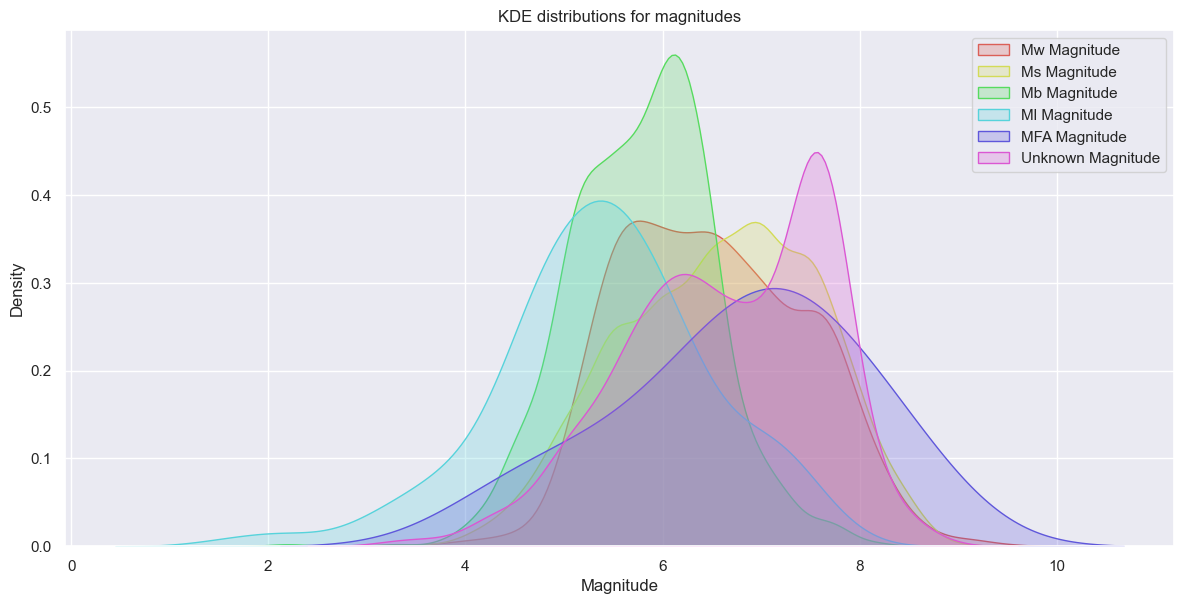

In [24]:
# Plot distributios of all magnitudes

fig, ax = plt.subplots(figsize=(12, 6))
palette = iter(sns.color_palette("hls", n_colors=len(magnitude_columns)))

for col in magnitude_columns:
    sns.kdeplot(data=magnitude_data[col],
                color=next(palette), label=col, fill=True, ax=ax)
plt.xlabel("Magnitude")
ax.legend()
plt.tight_layout()
plt.title("KDE distributions for magnitudes")
plt.show()

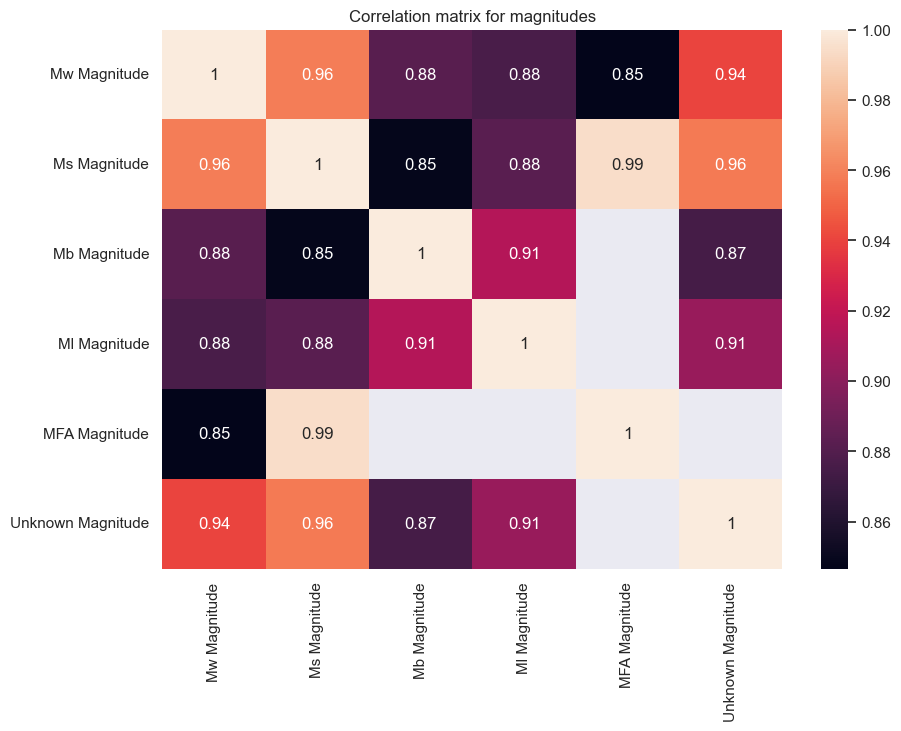

In [25]:
# Correlation between magnitudes
magnitudes_corr_matrix = magnitude_data.corr()
plt.figure(figsize=(10,7))
sns.heatmap(magnitudes_corr_matrix, annot=True)
plt.title("Correlation matrix for magnitudes")
plt.show()

As we can see from heatplot correlation between different magnitudes are very high and also their distributions does not differ a lot. Let's see which magnitude is usually taken for EQ Primary measure, but whatever scale is most used, because of high correlations, for further analysis it would probably be enough to just look at EQ Primary measure.

In [26]:
taken_indecies = []
for col in magnitude_columns:
    magnitude_taken = magnitude_data[col] == data["EQ Primary"]
    magnitude_data = magnitude_data.copy() # to suppress warning
    magnitude_data[f"{col} Taken"] = magnitude_taken
    taken_indecies.extend(magnitude_data[magnitude_data[f"{col} Taken"]].index)

not_taken = set(magnitude_data.index).difference(set(taken_indecies))
nan_values_count = data.loc[list(not_taken), "EQ Primary"].isna().sum()

if len(not_taken) == nan_values_count:
    print("All EQ Primary measures are taken from magnitudes if they are not null!")
else:
    print("Not all EQ Primary measures are taken from magnitudes if they are not null!")


All EQ Primary measures are taken from magnitudes if they are not null!


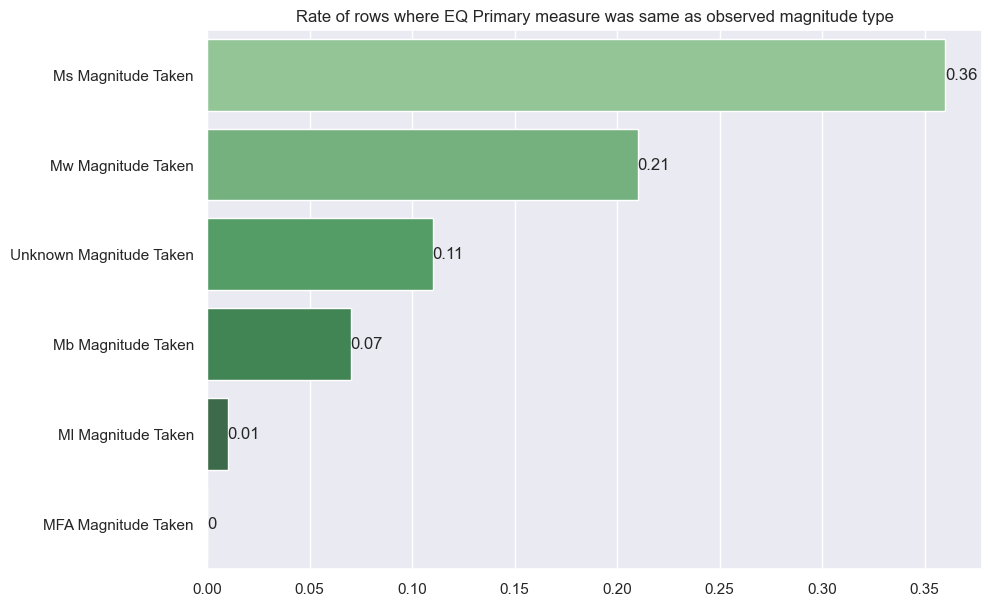

In [27]:
taken_indecies = []
for col in magnitude_columns:
    magnitude_taken = magnitude_data[col] == data["EQ Primary"]
    magnitude_data = magnitude_data.copy() # to suppress warning
    magnitude_data[f"{col} Taken"] = magnitude_taken

magnitudes_taken = magnitude_data.iloc[:, -len(magnitude_columns):]

counts = round(magnitudes_taken.sum() / magnitudes_taken.shape[0], 2)
counts = counts.sort_values(ascending=False)
sns.set(font_scale=1, rc={"figure.figsize": (10, 7)})
ax = sns.barplot(x=counts.values, y=counts.index, palette="Greens_d")
ax.bar_label(ax.containers[0])
plt.title("Rate of rows where EQ Primary measure was same as observed magnitude type")
plt.show()


From last plot we can see that Ms, Mw and Unknown magnitudes are mostly used. All of them are very highly correlated by pairs (> 0.94), so it is safe enough to observe only EQ Primary in later analysis.

#### Earthquake Effects

In [39]:
earthquake_effects_numerical_columns = [
    "Earthquake : Deaths",
    "Earthquake : Missing",
    "Earthquake : Injuries",
    "Earthquake : Damage (in M$)",
    "Earthquakes : Houses destroyed",
    "Earthquakes : Houses damaged",
]

earthquake_effects_categorical_columns =  [
    "Earthquake : Deaths Description",
    "Earthquake : Missing Description",
    "Earthquake : Injuries Description",
    "Earthquake : Damage Description",
    "Earthquakes : Houses destroyed Description",
    "Earthquakes : Houses damaged Description"
]

earthquake_effects_columns = earthquake_effects_numerical_columns + earthquake_effects_categorical_columns

earthquake_effects_data = data[earthquake_effects_columns]
earthquake_effects_data.tail()

,Earthquake : Deaths,Earthquake : Missing,Earthquake : Injuries,Earthquake : Damage (in M$),Earthquakes : Houses destroyed,Earthquakes : Houses damaged,Earthquake : Deaths Description,Earthquake : Missing Description,Earthquake : Injuries Description,Earthquake : Damage Description,Earthquakes : Houses destroyed Description,Earthquakes : Houses damaged Description
ID Earthquake,,,,,,,,,,,,
10245,NaN,NaN,5.0,NaN,1.0,NaN,NaN,NaN,Few (~1 to 50 deaths),LIMITED (roughly corresponding to less than $1...,Few (~1 to 50 houses),Few (~1 to 50 houses)
10267,369.0,NaN,6000.0,8000.000,226.0,184000.0,Many (~101 to 1000 deaths),NaN,Very Many (~1001 or more deaths),EXTREME (~$25 million or more),Many (~101 to 1000 houses),Very Many (~1001 or more houses)
10367,1.0,NaN,NaN,NaN,NaN,NaN,Few (~1 to 50 deaths),NaN,NaN,NaN,NaN,NaN
10430,1.0,NaN,NaN,NaN,NaN,NaN,Few (~1 to 50 deaths),NaN,Few (~1 to 50 deaths),LIMITED (roughly corresponding to less than $1...,NaN,Few (~1 to 50 houses)
10515,1.0,NaN,51.0,0.565,51.0,453.0,Few (~1 to 50 deaths),NaN,Some (~51 to 100 deaths),LIMITED (roughly corresponding to less than $1...,Some (~51 to 100 houses),Many (~101 to 1000 houses)


In [40]:
earthquake_effects_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4756 entries, 1555 to 10515
Data columns (total 12 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Earthquake : Deaths                         1727 non-null   float64
 1   Earthquake : Missing                        21 non-null     float64
 2   Earthquake : Injuries                       1229 non-null   float64
 3   Earthquake : Damage (in M$)                 511 non-null    float64
 4   Earthquakes : Houses destroyed              732 non-null    float64
 5   Earthquakes : Houses damaged                480 non-null    float64
 6   Earthquake : Deaths Description             1944 non-null   object 
 7   Earthquake : Missing Description            20 non-null     object 
 8   Earthquake : Injuries Description           1407 non-null   object 
 9   Earthquake : Damage Description             3432 non-null   object 
 10  Earthqua

In [41]:
earthquake_effects_data.describe()

,Earthquake : Deaths,Earthquake : Missing,Earthquake : Injuries,Earthquake : Damage (in M$),Earthquakes : Houses destroyed,Earthquakes : Houses damaged
count,1727.000000,21.000000,1229.000000,511.000000,7.320000e+02,4.800000e+02
mean,1569.771280,2182.761905,2186.245728,1252.089894,1.829036e+04,2.537835e+04
std,12703.550999,9463.737100,26429.600695,6733.908952,2.042285e+05,2.521993e+05
min,1.000000,1.000000,1.000000,0.013000,1.000000e+00,1.000000e+00
25%,2.000000,5.000000,10.000000,3.950000,6.000000e+01,9.000000e+01
50%,12.000000,21.000000,40.000000,22.000000,5.000000e+02,6.605000e+02
75%,110.000000,114.000000,200.000000,200.000000,3.618250e+03,3.421750e+03
max,316000.000000,43476.000000,799000.000000,100000.000000,5.360000e+06,5.360000e+06


Plotting univariate distributions


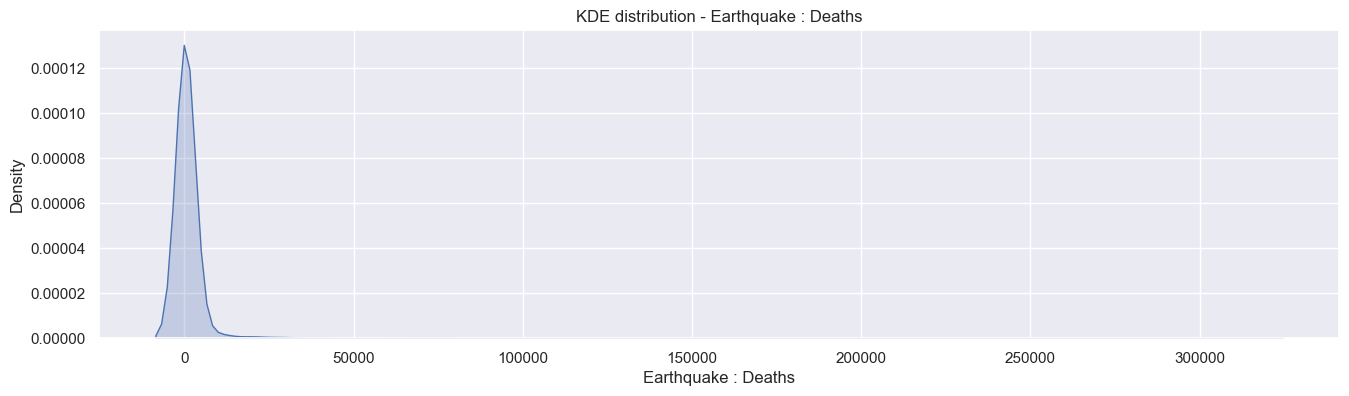

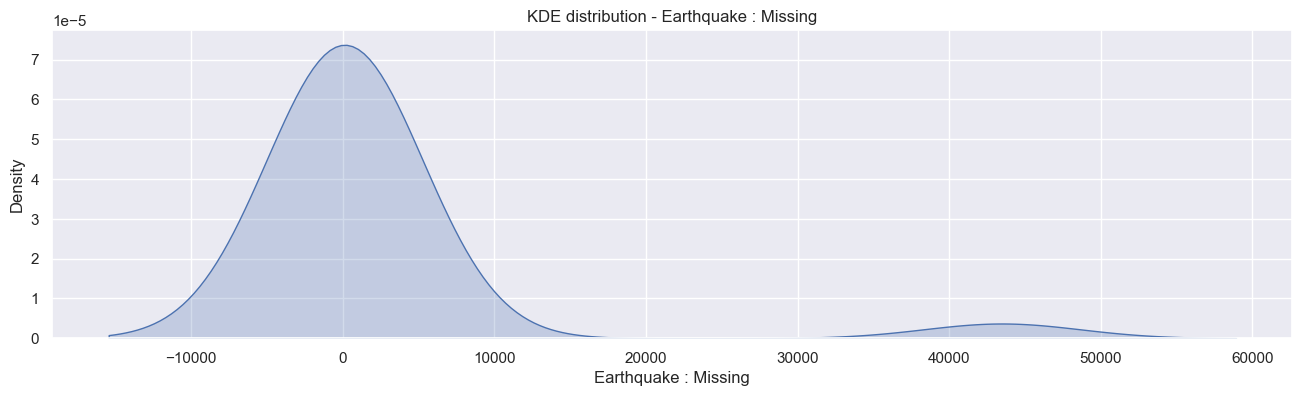

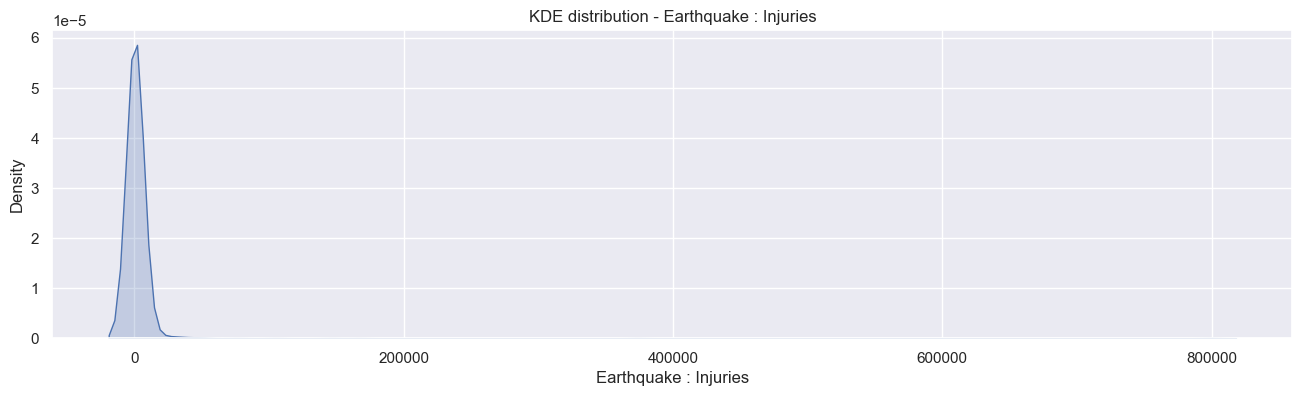

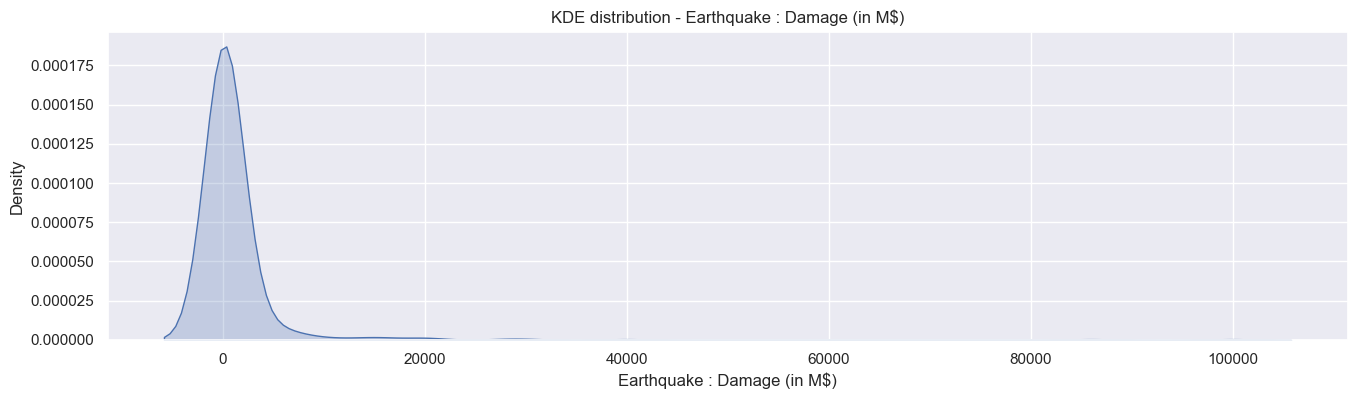

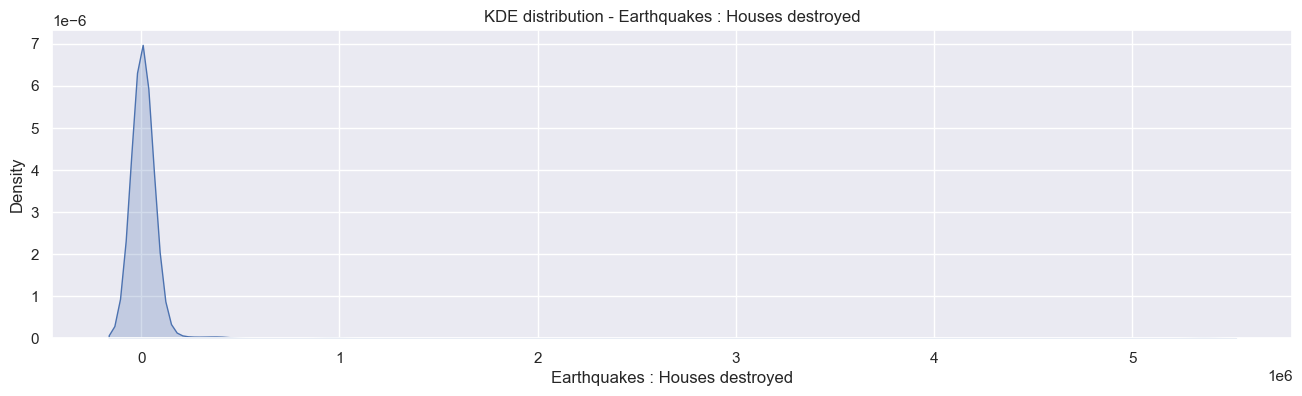

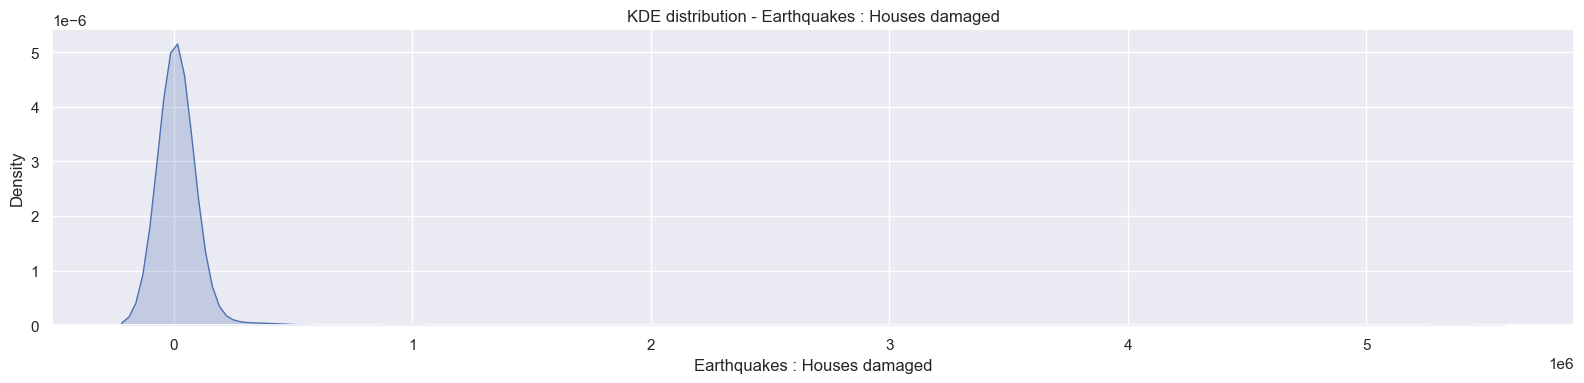

In [42]:
# Plot distributions of numerical data for earthquake effects
def plot_univariate_distributions(df):
    for col in df.columns:
        fig = plt.figure(figsize=(16, 4))
        sns.kdeplot(df[col], fill=True)   
        plt.title(f"KDE distribution - {col}") 
    
    fig.tight_layout()
    plt.show()

print('Plotting univariate distributions')
earthquake_effects_numerical_data = earthquake_effects_data[earthquake_effects_numerical_columns]
plot_univariate_distributions(earthquake_effects_numerical_data)


From these distributions, because of the scale, we can see that all of them have some outliers with very large values. These outliers are probably earthquakes with most damage, deaths and other disasterous effects in history. We will further investigate that later, but for now it is important to notice them.

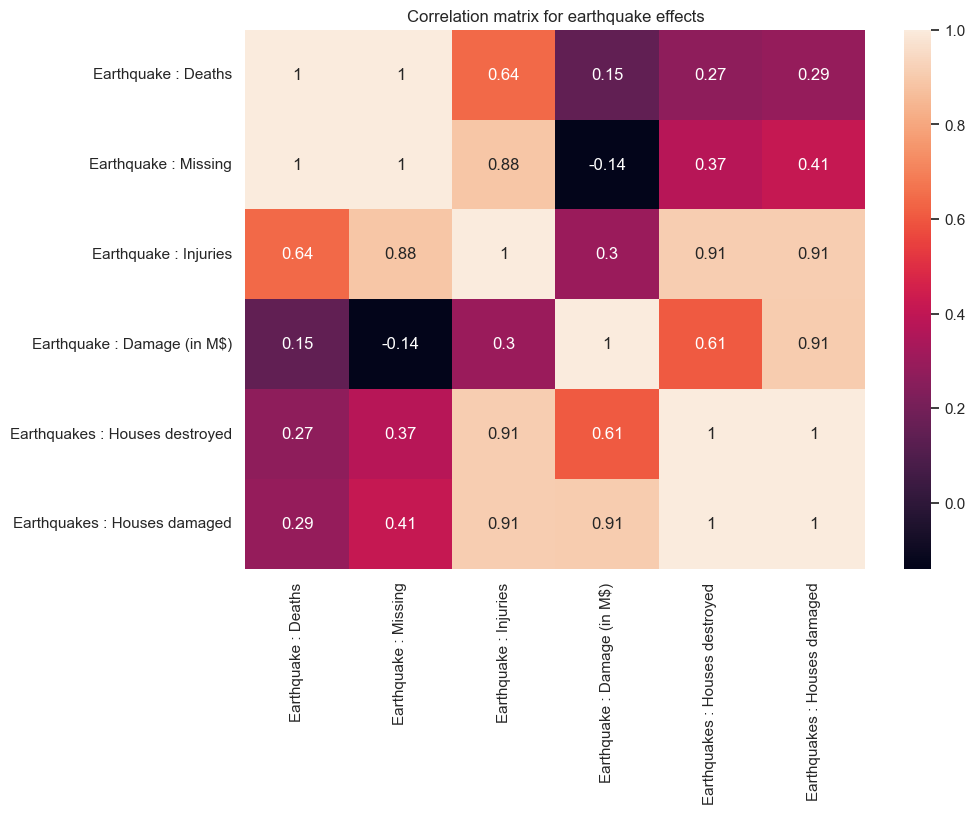

In [32]:
# Correlation between magnitudes
earthquake_effects_corr_matrix = earthquake_effects_data[earthquake_effects_numerical_columns].corr()
plt.figure(figsize=(10,7))
sns.heatmap(earthquake_effects_corr_matrix, annot=True)
plt.title("Correlation matrix for earthquake effects")
plt.show()

From correlation matrix we can see that number of deaths and missing are perfectly correlated. Combining that with the fact that there are only 21 non-null values of missing peapole, this column will not be particulary useful. <br>
Number of houses damaged and destroyed are also perfectly correlated and because of that it will probably be enough to retain just one of these columns. <br>
Beside that we can see that number of injuries is highly correlated with damaged and destroyed houses.

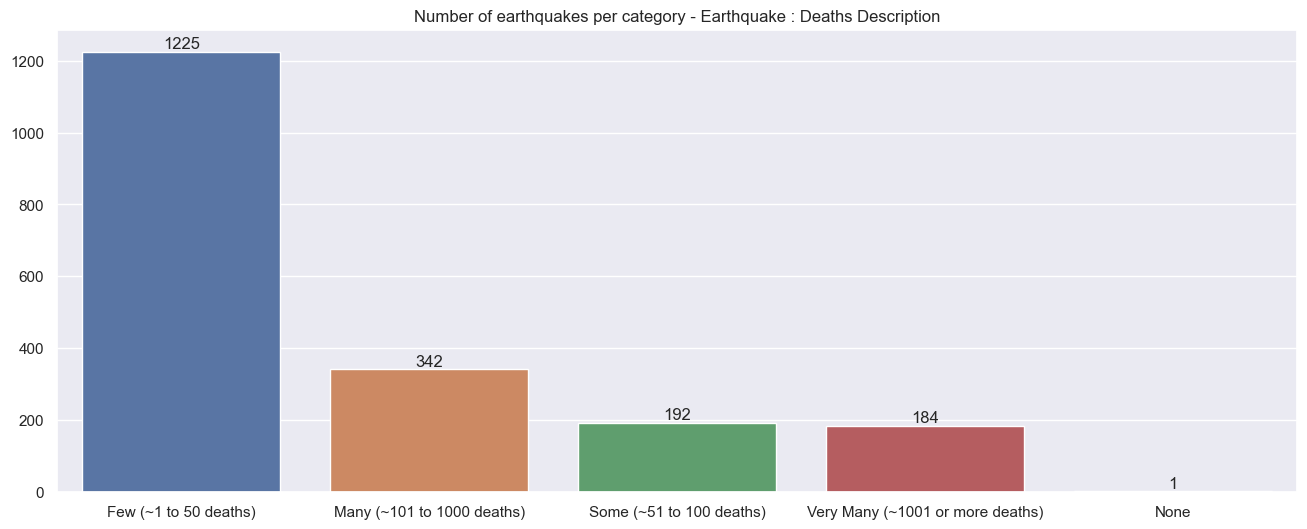

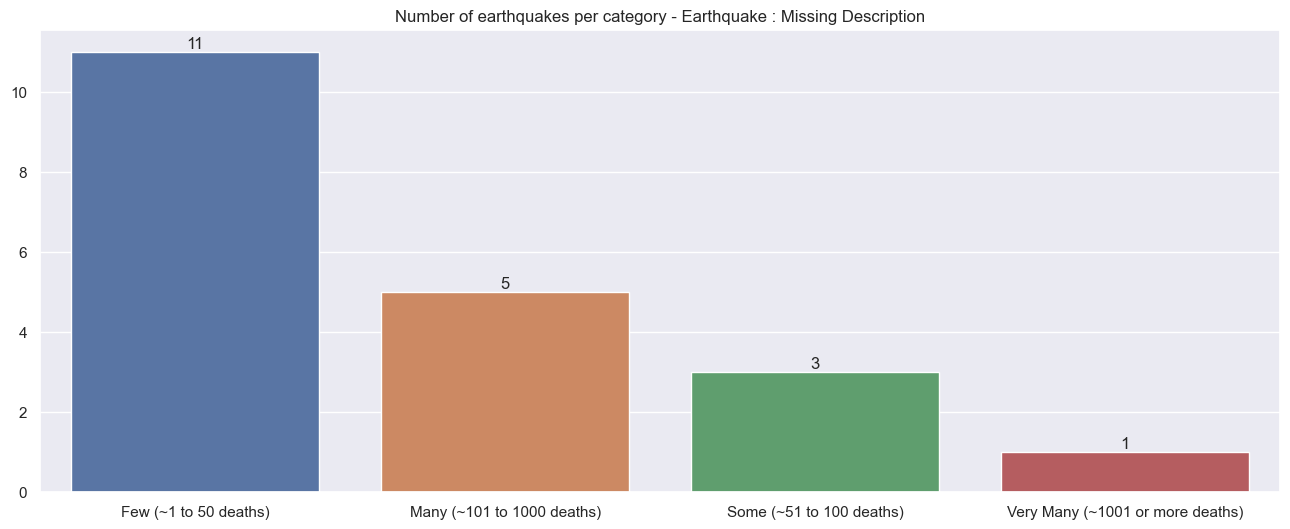

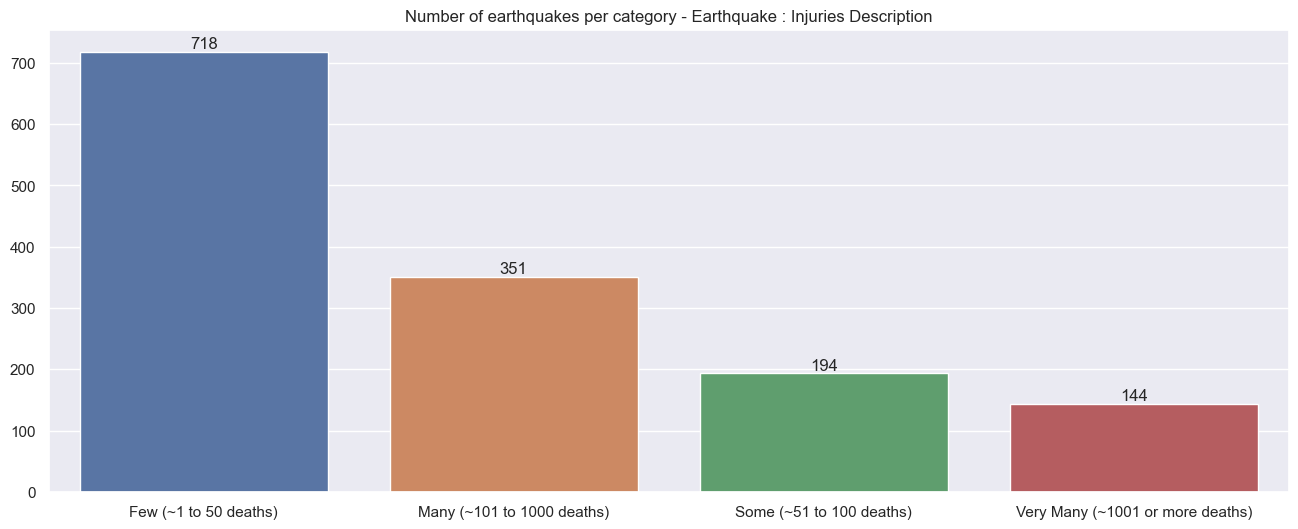

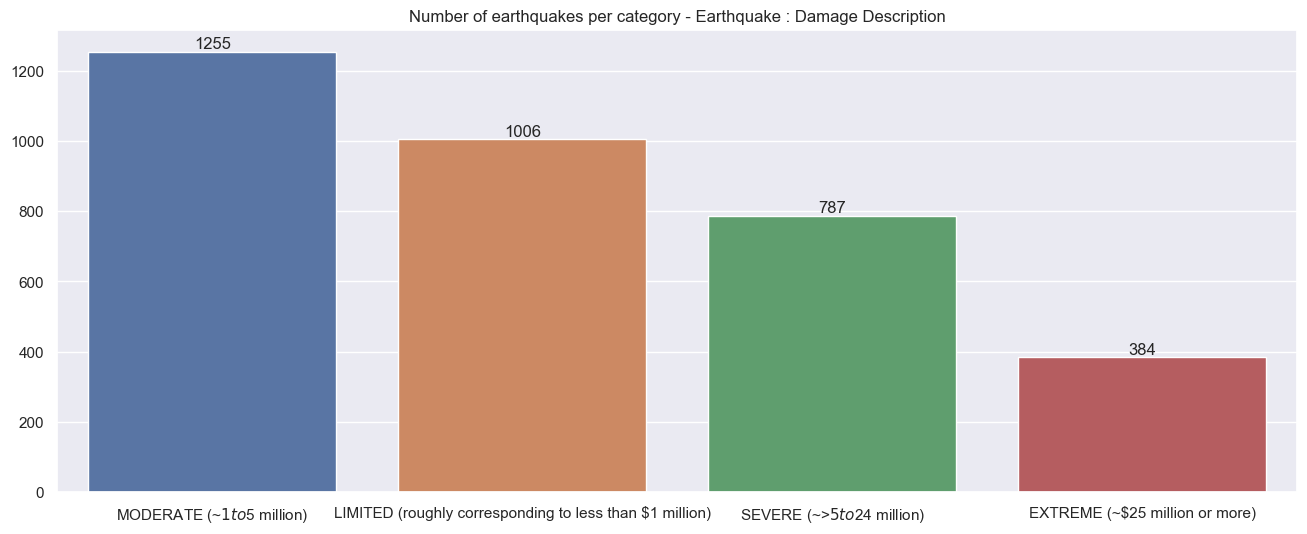

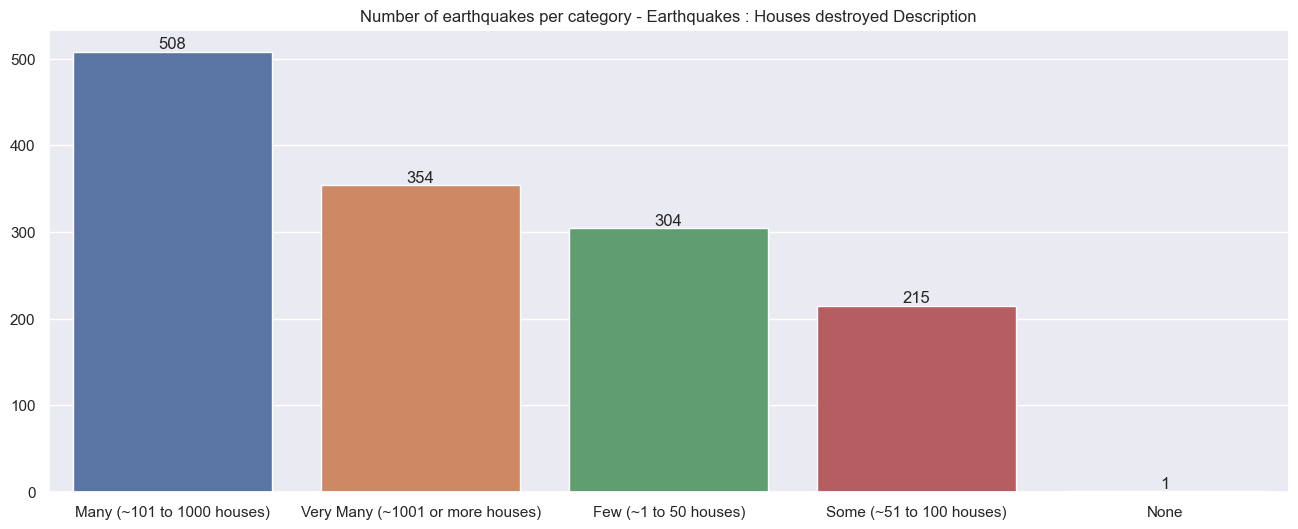

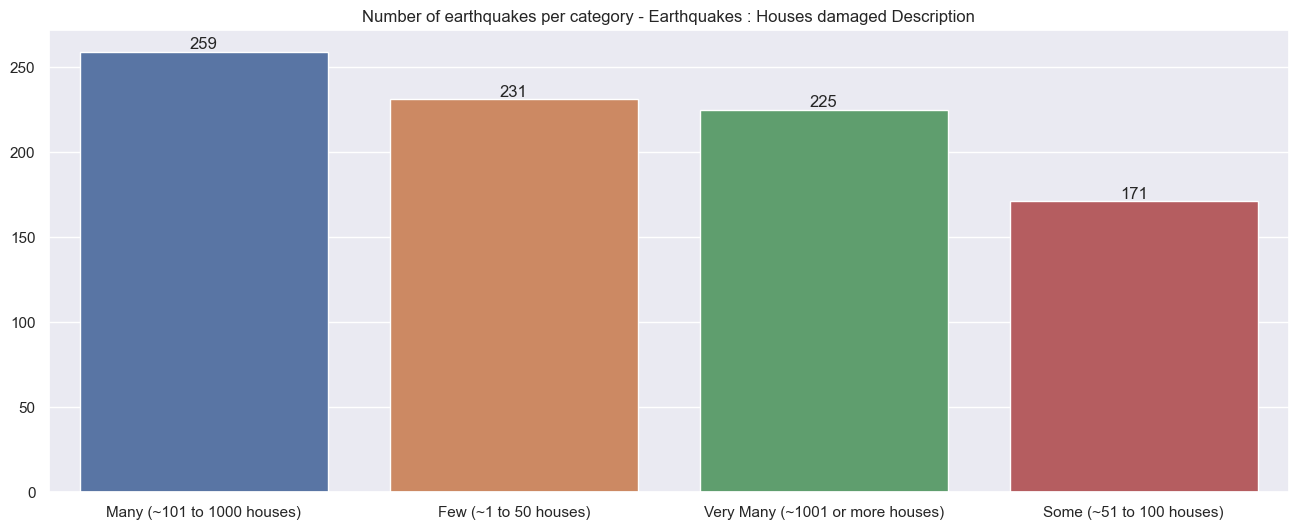

In [51]:
# Categorical data
def plot_categorical(df, col, width=16, height=10):
    group_df = df[col].value_counts()
    sns.set(font_scale=1, rc={"figure.figsize": (width, height)})
    ax = sns.barplot(x=group_df.index, y=group_df.values)
    ax.bar_label(ax.containers[0])
    plt.title(f"Number of earthquakes per category - {col}")
    plt.show()

earthquake_effects_categorical_data = earthquake_effects_data[earthquake_effects_categorical_columns]
for col in earthquake_effects_categorical_columns:
    plot_categorical(earthquake_effects_categorical_data, col, width=16, height=6)

We can see that except damaged and destroyed houses number of earthquakes with more severe effects is less than with moderate and small effects. In these columns we have two None values, whse meaning is not clear yet. These distributions also not take null values into account (there is a lot of them), so this analysis will be more meaningful when we use only newer data (not in whole history). Then one of the questions is to determin meaning of null values. 

### Null Values, Row and Column Selection

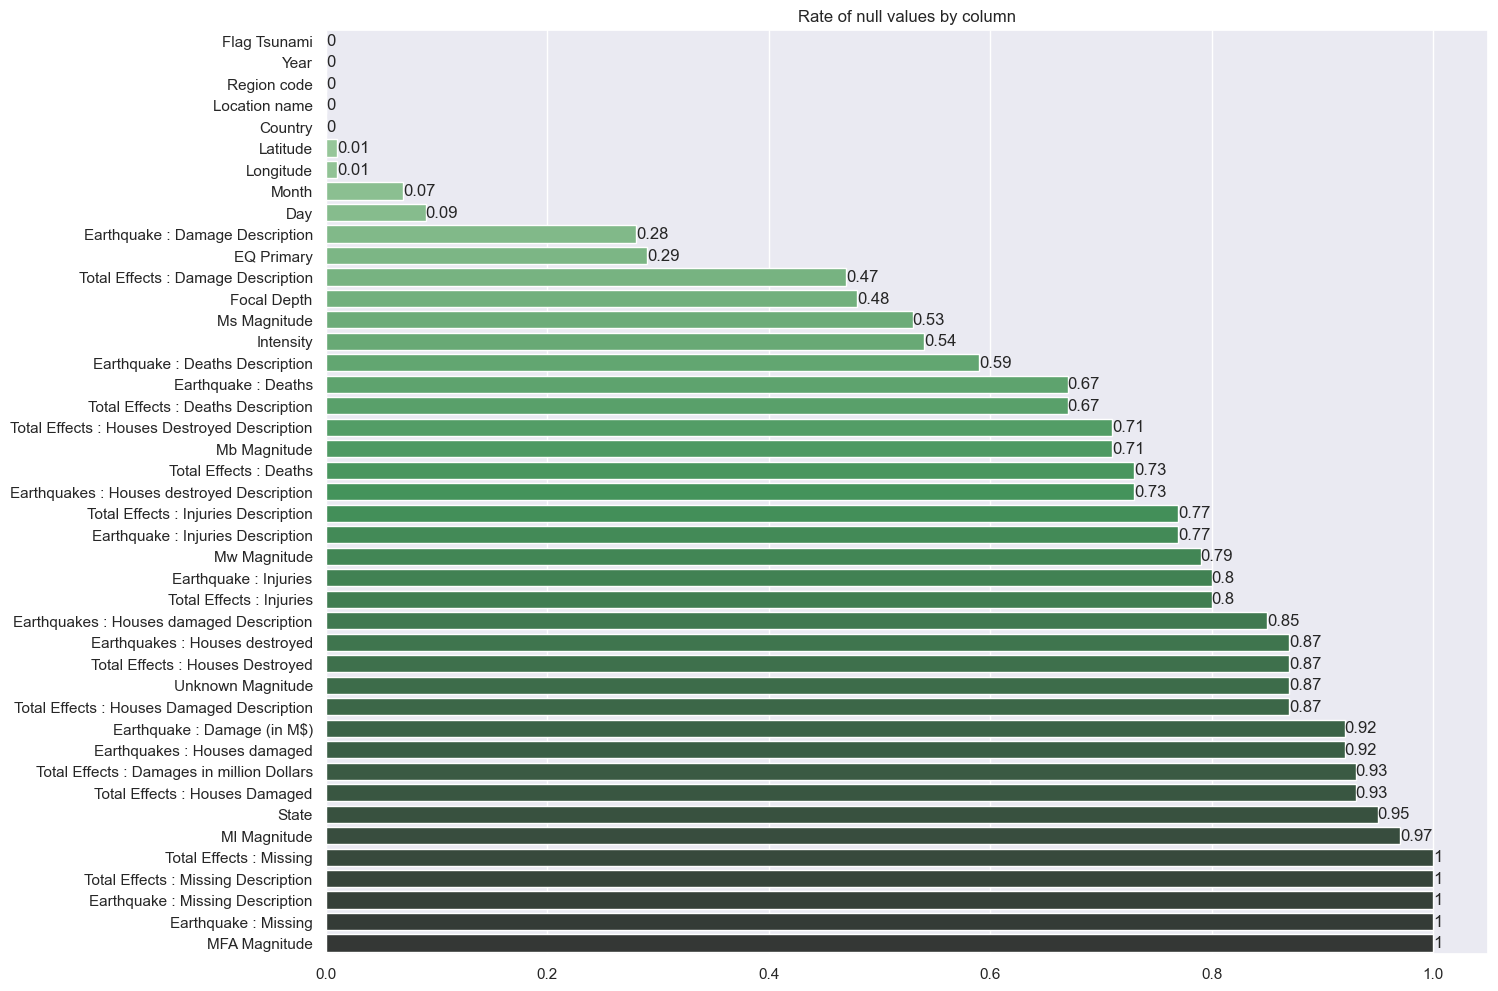

In [33]:
def null_values_by_columns(df):
    null_counts = round(df.isnull().sum() / df.shape[0], 2)
    null_counts = null_counts.sort_values()
    sns.set(font_scale=1, rc={"figure.figsize": (15, 12)})
    ax = sns.barplot(x=null_counts.values, y=null_counts.index, palette="Greens_d")
    ax.bar_label(ax.containers[0])
    plt.title("Rate of null values by column")
    plt.show()

null_values_by_columns(data)

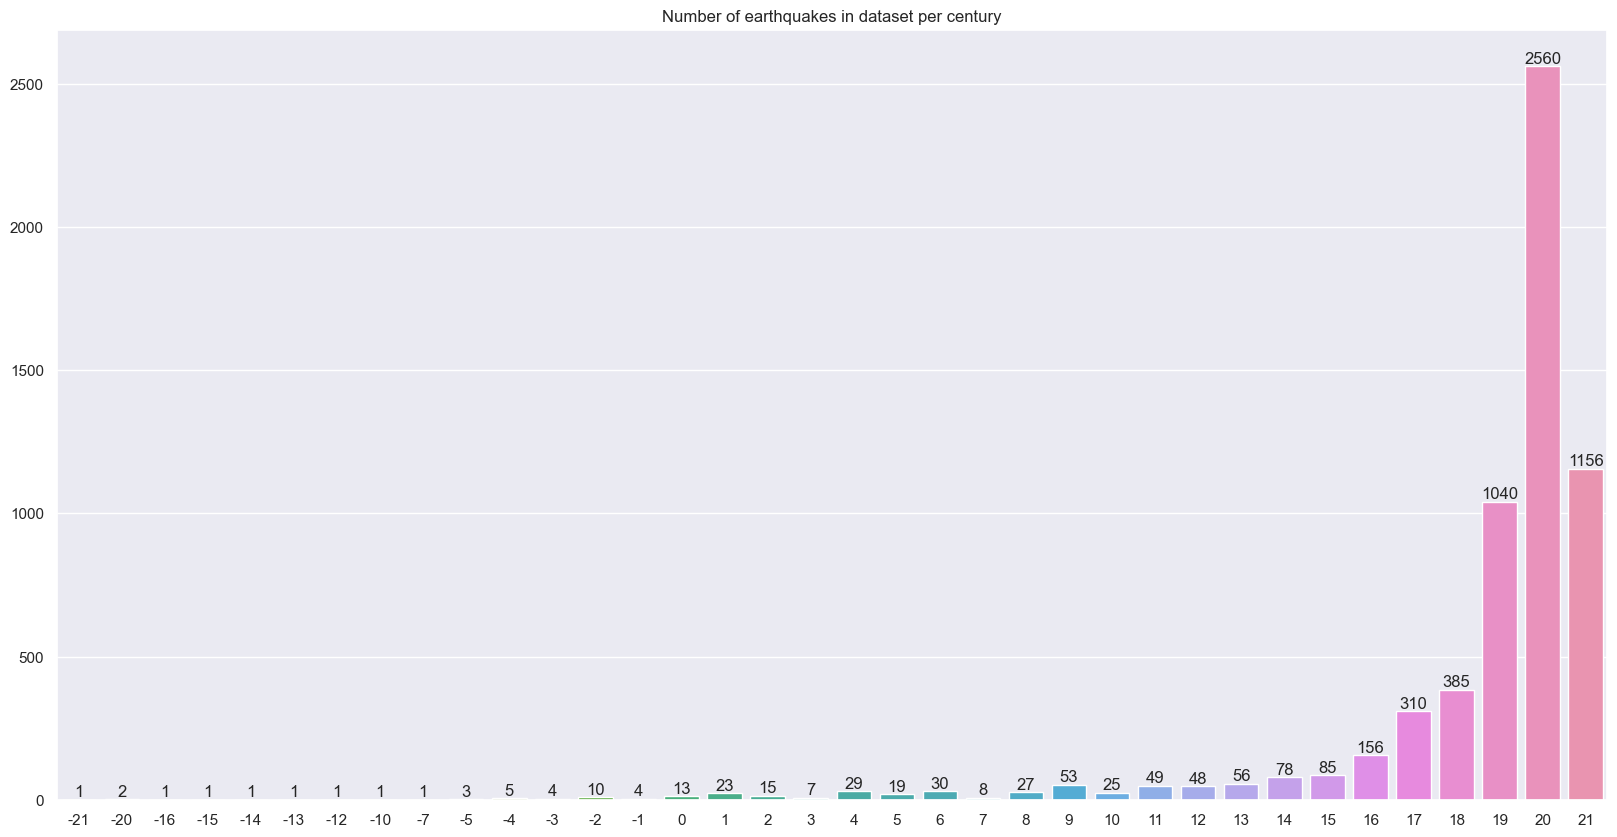

In [34]:
# Count number of recorded significant earthquakes per century
century = ((data["Year"] - 1) // 100 + 1).value_counts().sort_index()
sns.set(font_scale=1, rc={"figure.figsize": (20, 10)})
ax = sns.barplot(x=century.index, y=century.values)
ax.bar_label(ax.containers[0])
plt.title("Number of earthquakes in dataset per century")
plt.show()

We can see that there is very small amount of earthquakes recorded before 19th century. Because of that in order to have more consistent analysis we will drop from dataset all earthquakes that happended before that period.

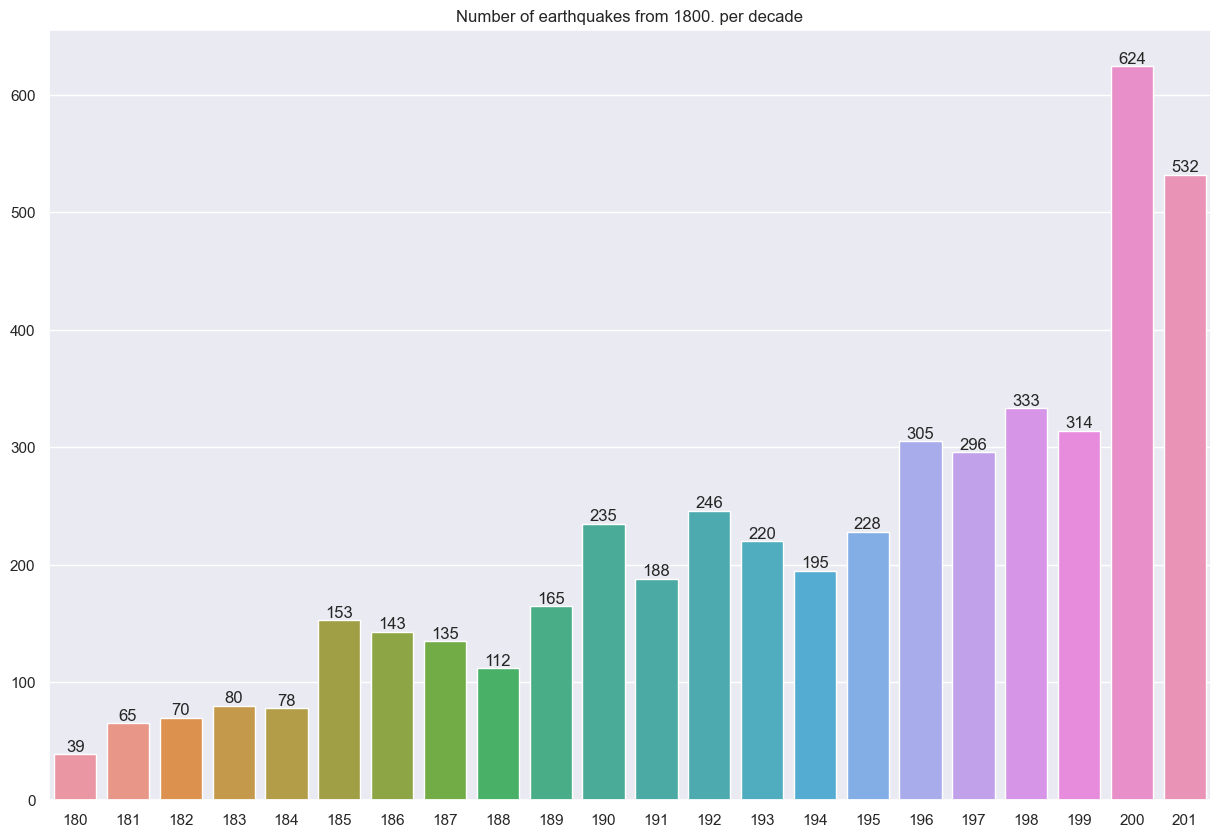

In [35]:
# Count number of recorded significant earthquakes per decade from 1800
data = data[data["Year"] > 1800]
decades = ((data["Year"] - 1) // 10).value_counts().sort_index()
sns.set(font_scale=1, rc={"figure.figsize": (15, 10)})
ax = sns.barplot(x=decades.index, y=decades.values)
ax.bar_label(ax.containers[0])
plt.title("Number of earthquakes from 1800. per decade")
plt.show()

Again we can see steady increase of recorded earthquakes over decades from 19th to 21st century. Question is why is that happening? One of the certain reasons is that with development of technologies our recordings of different factors of earthquakes are more accurate. Let's see what of the 5 reasons (caused deaths, more than 1 million dollars damage, magnitude 7.5 or greater, intensity 10 or more, genarated tsunami) was most common and how that distribution changes over decades.

In [36]:
satisfies_magnitude = data["EQ Primary"] >= 7.5
satisfies_deaths = data["Earthquake : Deaths"] > 0
satisfies_tsunami = data["Flag Tsunami"]